In [141]:
import pandas as pdimport 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

<h2>Load Data</h2>

In [223]:
auto_sales = pd.read_csv('data/us_monthly_auto_sales.csv')
auto_sales.rename(columns={"Month":"date"}, inplace=True)
auto_sales['date'] = pd.to_datetime(auto_sales['date'])
auto_sales = auto_sales.groupby(auto_sales['date'].dt.to_period('M')).sum()

tire_imports = pd.read_csv('data/us_tire_imports_by_day.csv')
tire_imports.rename(columns={"actual_arrival_date":"date", "sum":"Total_Tire_Imports"}, inplace=True)
tire_imports['date'] = pd.to_datetime(tire_imports['date'])
tire_imports = tire_imports.groupby(tire_imports['date'].dt.to_period('M')).sum()

In [224]:
auto_sales.head()

,Total_Auto_Sales
date,
2017-06,17200000.0
2017-07,17180000.0
2017-08,17020000.0
2017-09,18380000.0
2017-10,18200000.0


In [225]:
tire_imports.head()

,Total_Tire_Imports
date,
2017-02,349.0
2017-03,1340.0
2017-04,5238.0
2017-05,13497.0
2017-06,2174.0


<h2>Unshifted</h2>

<AxesSubplot:xlabel='date'>

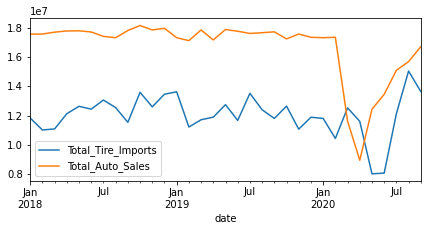

In [226]:
df = pd.merge(tire_imports, auto_sales, how="left", on="date")
df = df[df.index >= '2018-01-01']
df.plot(figsize=(7,3))

In [227]:
df.corr()

,Total_Tire_Imports,Total_Auto_Sales
Total_Tire_Imports,1.000000,0.343052
Total_Auto_Sales,0.343052,1.000000


<AxesSubplot:xlabel='Total_Tire_Imports', ylabel='Total_Auto_Sales'>

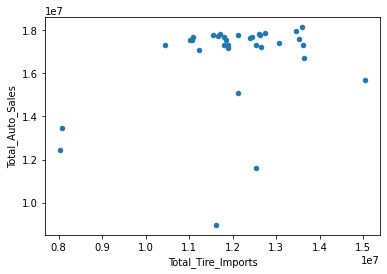

In [228]:
df.plot.scatter(x='Total_Tire_Imports', y='Total_Auto_Sales')

In [229]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf = LinearRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1244676.2995649371
Mean Squared Error: 1765934136893.7776
Root Mean Squared Error: 1328884.5461114286


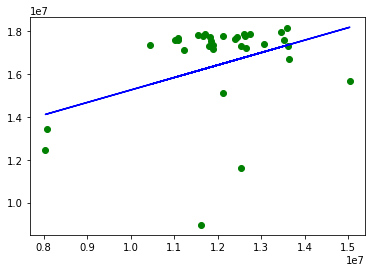

In [233]:
plt.scatter(X, y,color='g')
plt.plot(X, clf.predict(X),color='b')
plt.show()

<h2>Shifted</h2>

<AxesSubplot:xlabel='date'>

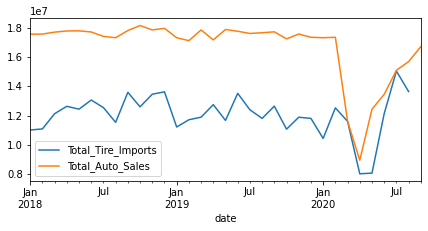

In [237]:
df = pd.merge(tire_imports, auto_sales, how="left", on="date")
df = df[df.index >= '2018-01-01']
df['Total_Tire_Imports'] = df['Total_Tire_Imports'].shift(-1, freq='M').dropna()
df.plot(figsize=(7,3))

In [238]:
df.corr()

,Total_Tire_Imports,Total_Auto_Sales
Total_Tire_Imports,1.000000,0.532073
Total_Auto_Sales,0.532073,1.000000


<AxesSubplot:xlabel='Total_Tire_Imports', ylabel='Total_Auto_Sales'>

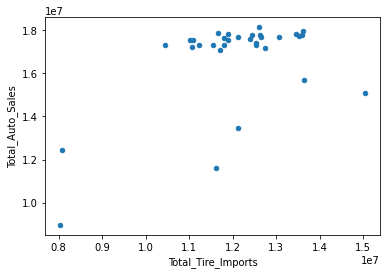

In [239]:
df.plot.scatter(x='Total_Tire_Imports', y='Total_Auto_Sales')

In [240]:
df = df.dropna()

X = df.iloc[:,:-1].values
y = df.iloc[:,1].values
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf = LinearRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 1005344.6875060385
Mean Squared Error: 1443193681202.72
Root Mean Squared Error: 1201329.9634999204


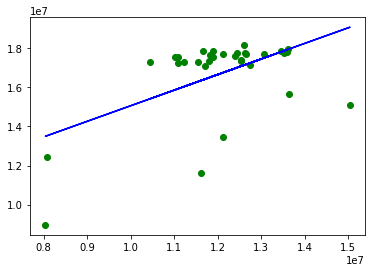

In [241]:
plt.scatter(X, y,color='g')
plt.plot(X, clf.predict(X),color='b')

plt.show()